# Training Data Display and Analysis
This is notebook is for viewing the data gathered during training runs of our agent. We're currently only supporting one traning file, but in the future we're probably going to split the data up into multiple files.


In [10]:
import numpy as np
import matplotlib
from matplotlib import cm
from matplotlib import colors
from matplotlib import pyplot as plt

BRD_HEIGHT = 20
BRD_WIDTH = 10

data = np.load('training_data.npy').item()

print("Games Played: " + str(len(data['Value'])))
print("States in database: " + str(data['Reward'][0]))
print("Average reward: " + str(data['Reward'][1]))
print("Average when we don't increase block height: " + str(data['R|NotUp'][1]))
print("Average when we increase block height: " + str(data['R|Up'][1]))
print("Average when we cover blocks: " + str(data['R|Cover'][1]))

i = 1
while True:
    tag = "R|Lines_Cleared_" + str(i)
    if tag in data:
        print("Average when we clear " + str(i) + " lines: " + str(data[tag][1]))
    else:
        break
    i = i + 1
    
print("\nMax Value: " + str(np.max(data['Value'])))
print("Min Value: " + str(np.min(data['Value'])))
print("Best Shapes: " + str(data['BEST_SHAPES']))

Games Played: 58
States in database: 2582
Average reward: 1.5805577072
Average when we don't increase block height: 23.5644599303
Average when we increase block height: -2.77097078228
Average when we cover blocks: -0.197169811321
Average when we clear 1 lines: 21.0486725664
Average when we clear 2 lines: 38.9032258065
Average when we clear 3 lines: 57.5

Max Value: 286
Min Value: -35
Best Shapes: ['R|I_1', 'R|L_3', 'R|L_1']


In [11]:
data

{'BEST_SHAPES': ['R|I_1', 'R|L_3', 'R|L_1'],
 'Board': array([[[   0.        ,    0.        ],
         [   0.        ,    0.        ],
         [   0.        ,    0.        ],
         [   0.        ,    0.        ],
         [   0.        ,    0.        ],
         [   3.        ,    1.        ],
         [  11.        ,    2.72727273],
         [  26.        ,    3.11538462],
         [  52.        ,    4.34615385],
         [  95.        ,    3.65263158],
         [ 129.        ,    4.13953488],
         [ 190.        ,    5.35263158],
         [ 266.        ,    6.2518797 ],
         [ 290.        ,    7.18965517],
         [ 402.        ,    7.17661692],
         [ 475.        ,    7.46736842],
         [ 508.        ,    7.66141732],
         [ 570.        ,    7.90877193],
         [ 541.        ,    7.76524954],
         [ 517.        ,    8.1450677 ]],
 
        [[   0.        ,    0.        ],
         [   4.        ,    1.        ],
         [   4.        ,    1.        ],


# Average Board State Representations

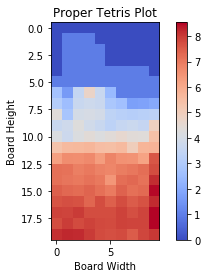

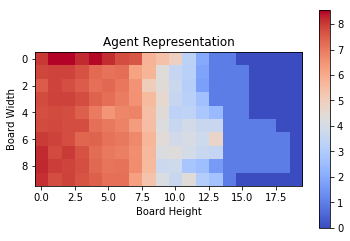

In [12]:
brd = data['Board']
grid = np.zeros((20,10))

for i in range(len(brd)):
    for j in range(len(brd[i])):
        grid[j][i] = brd[i,j,1]
            
plt.imshow(grid, cmap = cm.coolwarm)
plt.colorbar()

plt.title('Proper Tetris Plot')
plt.xlabel('Board Width')
plt.ylabel('Board Height')
plt.show()

grid = np.zeros((10,20))

for i in range(len(brd)):
    for j in range(len(brd[i])):
        grid[9 - i][19 - j] = brd[i][j][1]

plt.imshow(grid, cmap = cm.coolwarm)
plt.colorbar()
plt.title('Agent Representation')
plt.xlabel('Board Height')
plt.ylabel('Board Width')
plt.show()

# Learning Curve

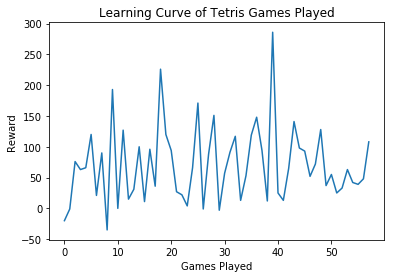

In [13]:
plt.plot(data['Value'])
plt.title('Learning Curve of Tetris Games Played')
plt.xlabel('Games Played')
plt.ylabel('Reward')
plt.show()